# Is there a difference in the number of double faults based on gender?

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

home_team_dataframe = pd.DataFrame()
for file in os.listdir("raw/home_team_parquet"):
    single_stats = pd.read_parquet("raw/home_team_parquet/" + file)
    home_team_dataframe = pd.concat([home_team_dataframe, single_stats], axis= 'rows', ignore_index=True)

away_team_dataframe = pd.DataFrame()
for file in os.listdir("raw/away_team_parquet"):
    single_stats = pd.read_parquet("raw/away_team_parquet/" + file)
    away_team_dataframe = pd.concat([away_team_dataframe, single_stats], axis= 'rows', ignore_index=True)
    
statistics_dataframe = pd.DataFrame()
for file in os.listdir("raw/raw_statistics_parquet"):
    single_stats = pd.read_parquet("raw/raw_statistics_parquet/" + file)
    statistics_dataframe = pd.concat([statistics_dataframe, single_stats], axis= 'rows', ignore_index=True)

statistics_dataframe.head(10)

,match_id,period,statistic_category_name,statistic_name,home_stat,away_stat,compare_code,statistic_type,value_type,home_value,away_value,home_total,away_total
0,11674074,ALL,service,aces,1,2,2,positive,event,1,2,NaN,NaN
1,11674074,ALL,service,double_faults,1,3,2,negative,event,1,3,NaN,NaN
2,11674074,ALL,service,first_serve,34/52 (65%),26/57 (46%),1,positive,team,34,26,52.0,57.0
3,11674074,ALL,service,second_serve,17/18 (94%),28/31 (90%),1,positive,team,17,28,18.0,31.0
4,11674074,ALL,service,first_serve_points,25/34 (74%),11/26 (42%),1,positive,team,25,11,34.0,26.0
5,11674074,ALL,service,second_serve_points,14/18 (78%),18/31 (58%),1,positive,team,14,18,18.0,31.0
6,11674074,ALL,service,service_games_played,10,9,1,positive,event,10,9,NaN,NaN
7,11674074,ALL,service,break_points_saved,0/1 (0%),1/5 (20%),2,positive,team,0,1,1.0,5.0
8,11674074,ALL,points,total,67,42,1,positive,event,67,42,NaN,NaN
9,11674074,ALL,points,service_points_won,39,29,1,positive,event,39,29,NaN,NaN


In [3]:
statistics_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12263 entries, 0 to 12262
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   match_id                 12263 non-null  int64  
 1   period                   12263 non-null  object 
 2   statistic_category_name  12263 non-null  object 
 3   statistic_name           12263 non-null  object 
 4   home_stat                12263 non-null  object 
 5   away_stat                12263 non-null  object 
 6   compare_code             12263 non-null  int64  
 7   statistic_type           12263 non-null  object 
 8   value_type               12263 non-null  object 
 9   home_value               12263 non-null  int64  
 10  away_value               12263 non-null  int64  
 11  home_total               4837 non-null   float64
 12  away_total               4837 non-null   float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.2+ MB


  gender  home_value  away_value
0      F         722         681
1      M         370         251


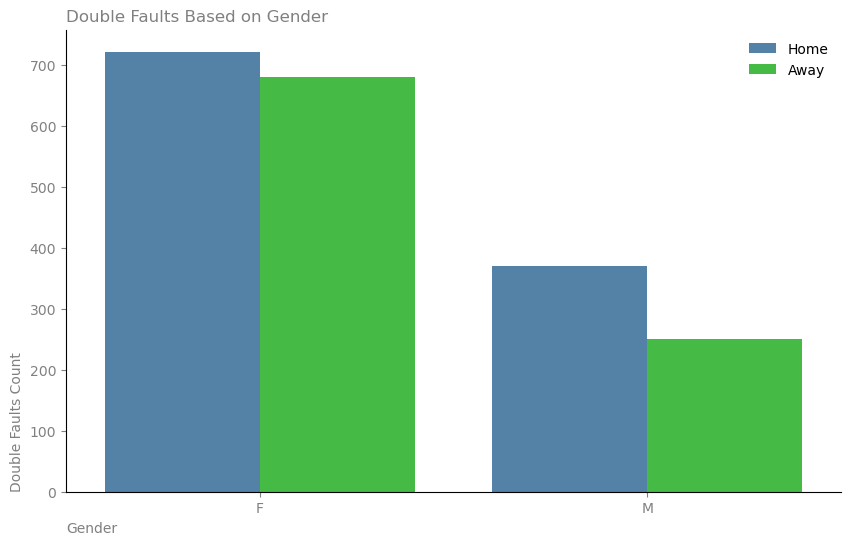

In [4]:


# فیلتر کردن داده‌های مربوط به خطاهای دوبل
home_double_faults = statistics_dataframe[statistics_dataframe['statistic_name'] == 'double_faults'].merge(home_team_dataframe, on='match_id')
away_double_faults = statistics_dataframe[statistics_dataframe['statistic_name'] == 'double_faults'].merge(away_team_dataframe, on='match_id')

# محاسبه مجموع خطاهای دوبل برای هر جنسیت
total_home_faults = home_double_faults.groupby('gender')['home_value'].sum().reset_index()
total_away_faults = away_double_faults.groupby('gender')['away_value'].sum().reset_index()

# ادغام مجموع‌ها
total_faults = pd.merge(total_home_faults, total_away_faults, on='gender', how='outer')

# تبدیل داده‌ها به فرمت مناسب برای رسم نمودار
total_faults_melted = pd.melt(total_faults, id_vars='gender', value_vars=['home_value', 'away_value'], var_name='team_type', value_name='double_faults')

# نمایش داده‌ها
print(total_faults)

# رنگ‌های مورد نظر
colors = ['#4682b4', '#32cd32']  # رنگ تیم میزبان و میهمان

# رسم نمودار
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='double_faults', hue='team_type', data=total_faults_melted, palette=colors, dodge=True)

# تنظیم عناوین legend
legend = plt.legend(fontsize=10, frameon=False)
legend.get_texts()[0].set_text('Home')
legend.get_texts()[1].set_text('Away')
plt.title('Double Faults Based on Gender', loc='left', color='gray')
plt.xlabel('Gender', loc='left', color='gray', fontsize=10)
plt.ylabel('Double Faults Count', loc='bottom', color='gray', fontsize=10)

# تغییر رنگ اعداد و خطوط مدرج به خاکستری
plt.tick_params(colors='gray')

# حذف حاشیه‌های راست و بالا
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()


lets try to clean `home_team_dataframe` and `away team_dataframe` and then rerun the plot code

In [5]:
home_team_dataframe['height'].fillna(home_team_dataframe['height'].mean(), inplace=True)
home_team_dataframe['weight'].fillna(home_team_dataframe['weight'].mean(), inplace=True)

home_team_dataframe.dropna(subset=['current_prize', 'total_prize', 'country', 'current_rank'], inplace=True)

home_team_dataframe['current_prize'] = home_team_dataframe['current_prize'].astype(float)
home_team_dataframe['total_prize'] = home_team_dataframe['total_prize'].astype(float)

home_team_dataframe['gender'] = home_team_dataframe['gender'].astype('category')
home_team_dataframe['country'] = home_team_dataframe['country'].astype('category')

home_team_dataframe.drop_duplicates(subset='match_id', inplace=True)


home_team_dataframe.drop(columns=['turned_pro', 'residence', 'birthplace'], inplace=True, errors='ignore')






away_team_dataframe['height'].fillna(away_team_dataframe['height'].mean(), inplace=True)
away_team_dataframe['weight'].fillna(away_team_dataframe['weight'].mean(), inplace=True)

away_team_dataframe.dropna(subset=['current_prize', 'total_prize', 'country', 'current_rank'], inplace=True)

away_team_dataframe['current_prize'] = away_team_dataframe['current_prize'].astype(float)
away_team_dataframe['total_prize'] = away_team_dataframe['total_prize'].astype(float)

away_team_dataframe['gender'] = away_team_dataframe['gender'].astype('category')
away_team_dataframe['country'] = away_team_dataframe['country'].astype('category')

away_team_dataframe.drop_duplicates(subset='match_id', inplace=True)


away_team_dataframe.drop(columns=['turned_pro', 'residence', 'birthplace'], inplace=True, errors='ignore')

  gender  home_value  away_value
0      F         680         677
1      M         366         245


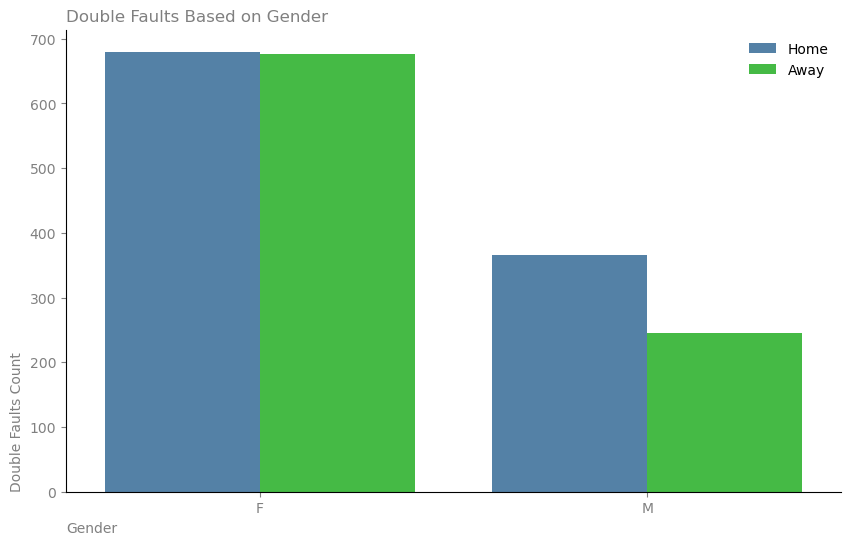

In [6]:


# فیلتر کردن داده‌های مربوط به خطاهای دوبل
home_double_faults = statistics_dataframe[statistics_dataframe['statistic_name'] == 'double_faults'].merge(home_team_dataframe, on='match_id')
away_double_faults = statistics_dataframe[statistics_dataframe['statistic_name'] == 'double_faults'].merge(away_team_dataframe, on='match_id')

# محاسبه مجموع خطاهای دوبل برای هر جنسیت
total_home_faults = home_double_faults.groupby('gender')['home_value'].sum().reset_index()
total_away_faults = away_double_faults.groupby('gender')['away_value'].sum().reset_index()

# ادغام مجموع‌ها
total_faults = pd.merge(total_home_faults, total_away_faults, on='gender', how='outer')

# تبدیل داده‌ها به فرمت مناسب برای رسم نمودار
total_faults_melted = pd.melt(total_faults, id_vars='gender', value_vars=['home_value', 'away_value'], var_name='team_type', value_name='double_faults')

# نمایش داده‌ها
print(total_faults)

# رنگ‌های مورد نظر
colors = ['#4682b4', '#32cd32']  # رنگ تیم خانه و میهمان

# رسم نمودار
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='double_faults', hue='team_type', data=total_faults_melted, palette=colors, dodge=True)

# تنظیم عناوین legend
legend = plt.legend(fontsize=10, frameon=False)
legend.get_texts()[0].set_text('Home')
legend.get_texts()[1].set_text('Away')
plt.title('Double Faults Based on Gender', loc='left', color='gray')
plt.xlabel('Gender', loc='left', color='gray', fontsize=10)
plt.ylabel('Double Faults Count', loc='bottom', color='gray', fontsize=10)

# تغییر رنگ اعداد و خطوط مدرج به خاکستری
plt.tick_params(colors='gray')

# حذف حاشیه‌های راست و بالا
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()


Checking only on the `home_team_dataframe` and `away_team_dataframe` that is shared in match_id

In [7]:
# تبدیل away_team_dataframe به جدولی که فقط در match_id با home_team_dataframe اشتراک دارد
away_shared_with_home = away_team_dataframe.merge(home_team_dataframe[['match_id']], on='match_id', how='inner')

# تبدیل home_team_dataframe به جدولی که فقط در match_id با away_team_dataframe اشتراک دارد
home_shared_with_away = home_team_dataframe.merge(away_team_dataframe[['match_id']], on='match_id', how='inner')

  gender  home_value  away_value
0      F         680         677
1      M         366         245


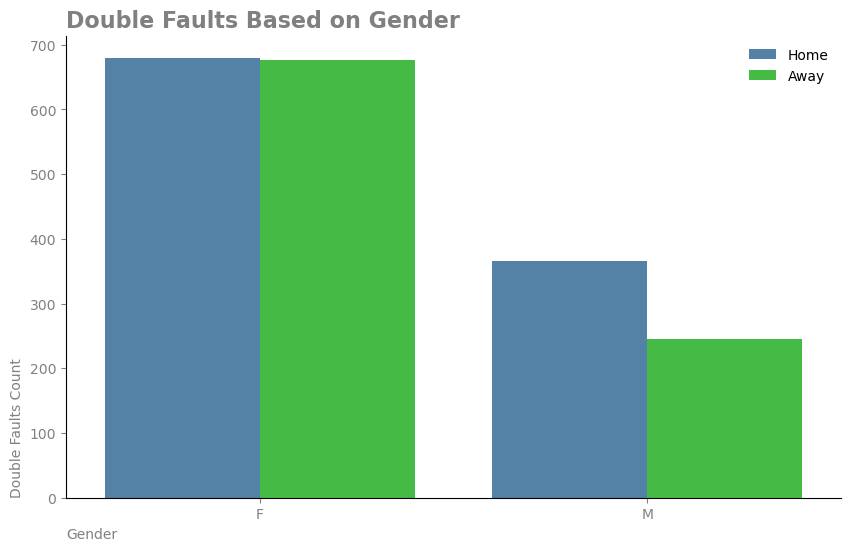

In [8]:


# فیلتر کردن داده‌های مربوط به خطاهای دوبل
home_double_faults = statistics_dataframe[statistics_dataframe['statistic_name'] == 'double_faults'].merge(home_team_dataframe, on='match_id')
away_double_faults = statistics_dataframe[statistics_dataframe['statistic_name'] == 'double_faults'].merge(away_team_dataframe, on='match_id')

# محاسبه مجموع خطاهای دوبل برای هر جنسیت
total_home_faults = home_double_faults.groupby('gender')['home_value'].sum().reset_index()
total_away_faults = away_double_faults.groupby('gender')['away_value'].sum().reset_index()

# ادغام مجموع‌ها
total_faults = pd.merge(total_home_faults, total_away_faults, on='gender', how='outer')

# تبدیل داده‌ها به فرمت مناسب برای رسم نمودار
total_faults_melted = pd.melt(total_faults, id_vars='gender', value_vars=['home_value', 'away_value'], var_name='team_type', value_name='double_faults')

# نمایش داده‌ها
print(total_faults)

# رنگ‌های مورد نظر
colors = ['#4682b4', '#32cd32']  # رنگ تیم خانه و میهمان

# رسم نمودار
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='double_faults', hue='team_type', data=total_faults_melted, palette=colors, dodge=True)

# تنظیم عناوین legend
legend = plt.legend(fontsize=10, frameon=False)
legend.get_texts()[0].set_text('Home')
legend.get_texts()[1].set_text('Away')
plt.title('Double Faults Based on Gender', fontsize=16, color='gray', loc='left', fontweight='bold')
plt.xlabel('Gender', loc='left', color='gray', fontsize=10)
plt.ylabel('Double Faults Count', loc='bottom', color='gray', fontsize=10)

# تغییر رنگ اعداد و خطوط مدرج به خاکستری
plt.tick_params(colors='gray')

# حذف حاشیه‌های راست و بالا
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()


"In examining the shared match IDs, we observe that there is not much distinction between women and men regarding double faults."